<a href="https://colab.research.google.com/github/Shalini-Mirani/ADSLAB/blob/main/ADSEXP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Importing Libraries***

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.impute import KNNImputer
import warnings
import matplotlib.dates as mdates
warnings.filterwarnings("ignore")

***Reading the dataset***

In [ ]:
df = pd.read_csv("/content/agricultural_raw_material.csv")
df.head()

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
0,Apr-90,482.34,-,236,-,1.83,-,"1,071.63",-,161.20,...,312.36,-,0.84,-,120.66,-,218.76,-,829.29,-
1,May-90,447.26,-7.27%,234,-0.85%,1.89,3.28%,"1,057.18",-1.35%,172.86,...,350.12,12.09%,0.85,1.19%,124.28,3.00%,213.00,-2.63%,842.51,1.59%
2,Jun-90,440.99,-1.40%,216,-7.69%,1.99,5.29%,898.24,-15.03%,181.67,...,373.94,6.80%,0.85,0.00%,129.45,4.16%,200.00,-6.10%,831.35,-1.32%
3,Jul-90,418.44,-5.11%,205,-5.09%,2.01,1.01%,895.83,-0.27%,187.96,...,378.48,1.21%,0.86,1.18%,124.23,-4.03%,210.05,5.03%,798.83,-3.91%
4,Aug-90,418.44,0.00%,198,-3.41%,1.79,-10.95%,951.22,6.18%,186.13,...,364.60,-3.67%,0.88,2.33%,129.70,4.40%,208.30,-0.83%,818.74,2.49%


In [ ]:
df.columns

Index(['Month', 'Coarse wool Price', 'Coarse wool price % Change',
       'Copra Price', 'Copra price % Change', 'Cotton Price',
       'Cotton price % Change', 'Fine wool Price', 'Fine wool price % Change',
       'Hard log Price', 'Hard log price % Change', 'Hard sawnwood Price',
       'Hard sawnwood price % Change', 'Hide Price', 'Hide price % change',
       'Plywood Price', 'Plywood price % Change', 'Rubber Price',
       'Rubber price % Change', 'Softlog Price', 'Softlog price % Change',
       'Soft sawnwood Price', 'Soft sawnwood price % Change',
       'Wood pulp Price', 'Wood pulp price % Change'],
      dtype='object')

***Checking null values count in each column****

In [ ]:
print(df.isnull().sum())

Month                            0
Coarse wool Price               34
Coarse wool price % Change      34
Copra Price                     22
Copra price % Change            22
Cotton Price                     0
Cotton price % Change            0
Fine wool Price                 34
Fine wool price % Change        34
Hard log Price                   0
Hard log price % Change          0
Hard sawnwood Price             34
Hard sawnwood price % Change    34
Hide Price                      34
Hide price % change             34
Plywood Price                    0
Plywood price % Change           0
Rubber Price                     0
Rubber price % Change            0
Softlog Price                   34
Softlog price % Change          34
Soft sawnwood Price             34
Soft sawnwood price % Change    34
Wood pulp Price                  1
Wood pulp price % Change         1
dtype: int64


***Taking columns with numeric values***

In [ ]:
numeric_cols = df.select_dtypes(include=["int", "float"]).columns
print(numeric_cols)

Index(['Cotton Price', 'Hard log Price', 'Hard sawnwood Price', 'Hide Price',
       'Plywood Price', 'Rubber Price', 'Softlog Price', 'Soft sawnwood Price',
       'Wood pulp Price'],
      dtype='object')


***Replacing 0 with NaN***

In [ ]:
df[['Cotton Price', 'Hard log Price', 'Hard sawnwood Price', 'Hide Price',
       'Plywood Price', 'Rubber Price', 'Softlog Price', 'Soft sawnwood Price',
       'Wood pulp Price']] = df[['Cotton Price', 'Hard log Price', 'Hard sawnwood Price', 'Hide Price',
       'Plywood Price', 'Rubber Price', 'Softlog Price', 'Soft sawnwood Price',
       'Wood pulp Price']].replace(0,np.NaN)
df.head()

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
0,Apr-90,482.34,-,236,-,1.83,-,"1,071.63",-,161.20,...,312.36,-,0.84,-,120.66,-,218.76,-,829.29,-
1,May-90,447.26,-7.27%,234,-0.85%,1.89,3.28%,"1,057.18",-1.35%,172.86,...,350.12,12.09%,0.85,1.19%,124.28,3.00%,213.00,-2.63%,842.51,1.59%
2,Jun-90,440.99,-1.40%,216,-7.69%,1.99,5.29%,898.24,-15.03%,181.67,...,373.94,6.80%,0.85,0.00%,129.45,4.16%,200.00,-6.10%,831.35,-1.32%
3,Jul-90,418.44,-5.11%,205,-5.09%,2.01,1.01%,895.83,-0.27%,187.96,...,378.48,1.21%,0.86,1.18%,124.23,-4.03%,210.05,5.03%,798.83,-3.91%
4,Aug-90,418.44,0.00%,198,-3.41%,1.79,-10.95%,951.22,6.18%,186.13,...,364.60,-3.67%,0.88,2.33%,129.70,4.40%,208.30,-0.83%,818.74,2.49%


In [ ]:
columns_to_check = ['Cotton Price', 'Hard log Price', 'Hard sawnwood Price', 'Hide Price',
       'Plywood Price', 'Rubber Price', 'Softlog Price', 'Soft sawnwood Price',
       'Wood pulp Price']

def print_outlier_count(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_count = df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]
    print(f"Outliers count in {column}: {outliers_count}")
    df.drop(df[(df[column] < lower_bound) | (df[column] > upper_bound)].index, inplace=True)

for column in columns_to_check:
    print_outlier_count(column)

Outliers count in Cotton Price: 9
Outliers count in Hard log Price: 10
Outliers count in Hard sawnwood Price: 0
Outliers count in Hide Price: 11
Outliers count in Plywood Price: 0
Outliers count in Rubber Price: 9
Outliers count in Softlog Price: 0
Outliers count in Soft sawnwood Price: 27
Outliers count in Wood pulp Price: 0


***Checking mean***

In [ ]:
colmean = df[columns_to_check].mean()
print(colmean)

Cotton Price             1.556169
Hard log Price         242.157525
Hard sawnwood Price    697.428851
Hide Price              78.796207
Plywood Price          503.698034
Rubber Price             1.515864
Softlog Price          167.759425
Soft sawnwood Price    297.502912
Wood pulp Price        687.935170
dtype: float64


***Impututing data using the mean value***



In [ ]:
mean_imputer = SimpleImputer(missing_values = np.nan, strategy ='mean')
imputer_output = mean_imputer.fit_transform(df[columns_to_check])
df[columns_to_check] = imputer_output
selected_columns = df[columns_to_check]
print(selected_columns)

     Cotton Price  Hard log Price  Hard sawnwood Price  Hide Price  \
14           1.78          200.15           480.300000   86.700000   
17           1.55          210.68           582.790000   74.050000   
20           1.36          200.33           567.390000   71.290000   
23           1.22          201.96           602.240000   69.770000   
24           1.28          199.67           616.380000   75.950000   
..            ...             ...                  ...         ...   
356          1.67          272.80           697.428851   78.796207   
357          1.74          272.40           697.428851   78.796207   
358          1.69          270.56           697.428851   78.796207   
359          1.49          276.93           697.428851   78.796207   
360          1.40          276.24           697.428851   78.796207   

     Plywood Price  Rubber Price  Softlog Price  Soft sawnwood Price  \
14          361.26          0.84     121.460000           228.710000   
17          375

In [ ]:
print(selected_columns.isnull().sum())

Cotton Price           0
Hard log Price         0
Hard sawnwood Price    0
Hide Price             0
Plywood Price          0
Rubber Price           0
Softlog Price          0
Soft sawnwood Price    0
Wood pulp Price        0
dtype: int64


***VISUALIZATION***

#What we understand from this plot
It's a scatterplot that represents the relationship between the prices of Hard sawnwood and Hard log.
From this plot, we can observe that the relationship between the price is positive, strong and linear but also have gap in the values and outliers as well as forming clusters.

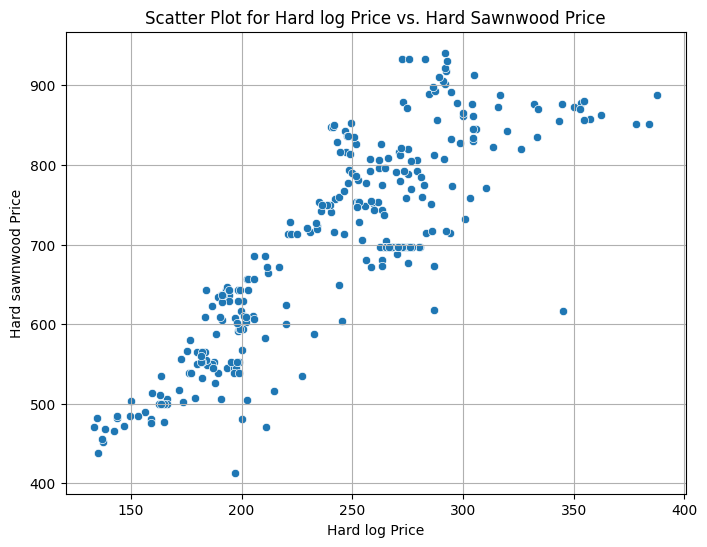

In [ ]:
# prompt: give scatter plot for cotton price and soft sandalwood price

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Hard log Price", y="Hard sawnwood Price")
plt.title("Scatter Plot for Hard log Price vs. Hard Sawnwood Price")
plt.grid(True)
plt.show()


#What we understood from this plot
This is a histogram plot of distribution of Hard log prices, the x-axis represents the price and y-axis the frequency.
From this plot, we can observe its not normally distributed but is distributed in spiked form.

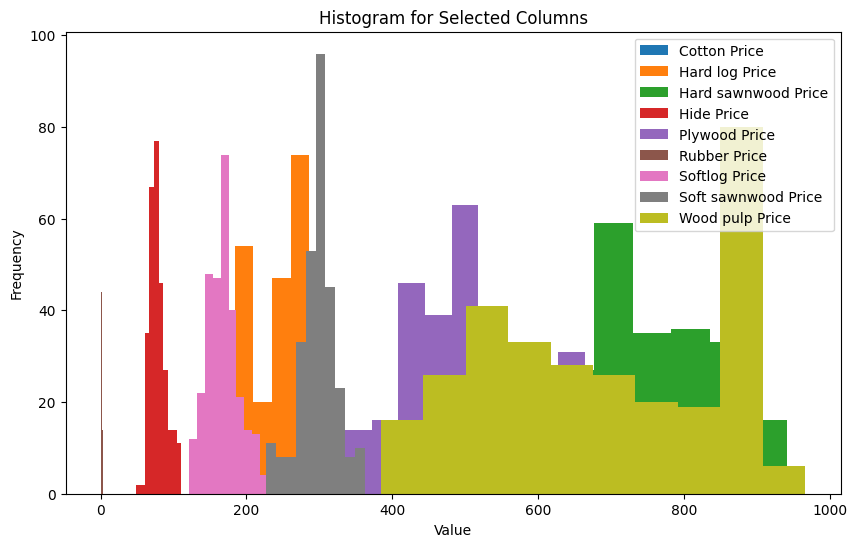

In [ ]:
# Create the histogram plot
plt.figure(figsize=(10, 6))
for column in selected_columns:
  plt.hist(df[column], bins=10, label=column)

plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram for Selected Columns")
plt.legend()
plt.show()


#What we understood from this plot
This graph shows us the difference between prices of the following items.

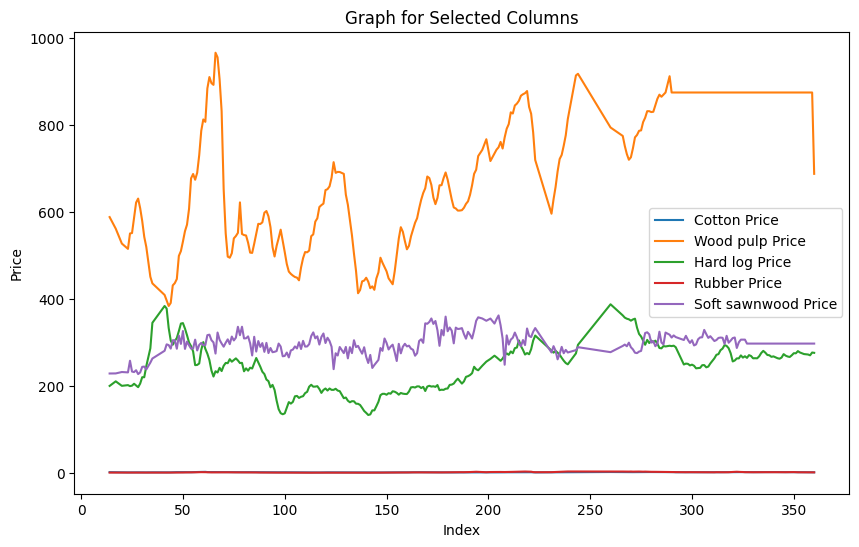

In [ ]:
selected_columns = ['Cotton Price', 'Wood pulp Price', 'Hard log Price', 'Rubber Price', 'Soft sawnwood Price']

# Create the line chart
plt.figure(figsize=(10, 6))
for column in selected_columns:
    plt.plot(df.index, df[column], label=column)

plt.xlabel("Index")
plt.ylabel("Price")
plt.title("Graph for Selected Columns")
plt.legend()
plt.show()


In [ ]:
new_df = df[numeric_cols].copy()

# Insert the 'Month' column at the beginning of the new DataFrame
new_df.insert(0, 'Month', df['Month'])

# Display the new DataFrame
print(new_df)

      Month  Cotton Price  Hard log Price  Hard sawnwood Price  Hide Price  \
14   Jun-91          1.78          200.15           480.300000   86.700000   
17   Sep-91          1.55          210.68           582.790000   74.050000   
20   Dec-91          1.36          200.33           567.390000   71.290000   
23   Mar-92          1.22          201.96           602.240000   69.770000   
24   Apr-92          1.28          199.67           616.380000   75.950000   
..      ...           ...             ...                  ...         ...   
356  Dec-19          1.67          272.80           697.428851   78.796207   
357  Jan-20          1.74          272.40           697.428851   78.796207   
358  Feb-20          1.69          270.56           697.428851   78.796207   
359  Mar-20          1.49          276.93           697.428851   78.796207   
360  Apr-20          1.40          276.24           697.428851   78.796207   

     Plywood Price  Rubber Price  Softlog Price  Soft sawnwood 

### What we understood from this plot
- The line plot shows the trend of the 'Hard Log Price' over time. It appears that the price fluctuates over the months represented on the x-axis.
- From the plot, we can observe how the price of hard log varies over time. We can see that price is hiked during Feb 1970 and Oct 1970.

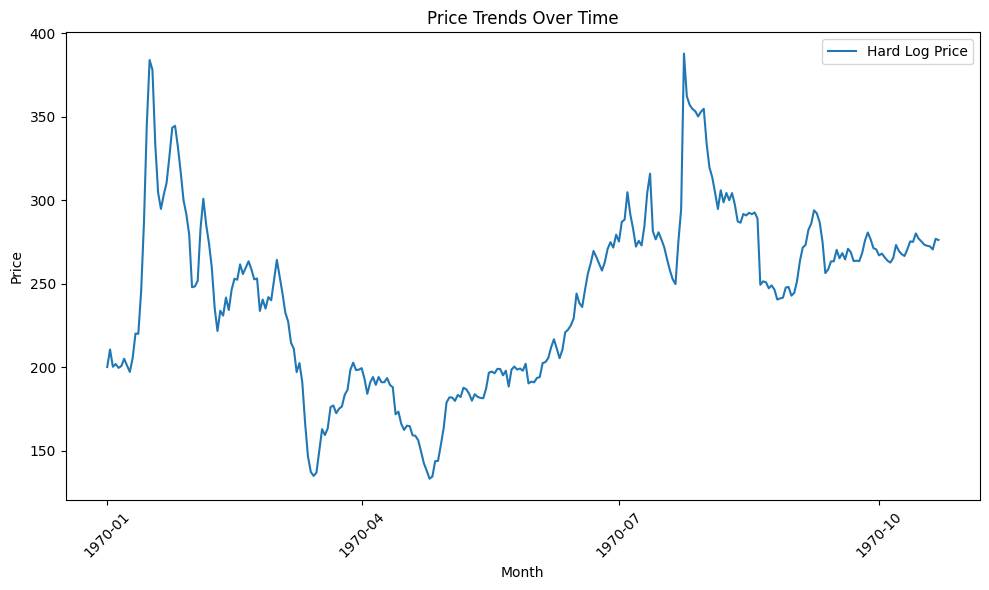

In [ ]:
# @title Hard Log Price Trends Over Time
plt.figure(figsize=(10, 6))

# Plotting
plt.plot(new_df['Month'], new_df['Hard log Price'], label='Hard Log Price')

# Formatting the x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Show ticks every 3 months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format the ticks as 'YYYY-MM'

# Labels and title
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Price Trends Over Time')

# Legend
plt.legend()

# Show plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


### What we understood from this plot
- Its a correlation matrix that tells us the relationship between the variables and how are they correlated with each other.
-  From the plot, we can observe the values are ranging from -0.2 to 1 where 1 means strongly correlated and -0.2 weakly correlated.

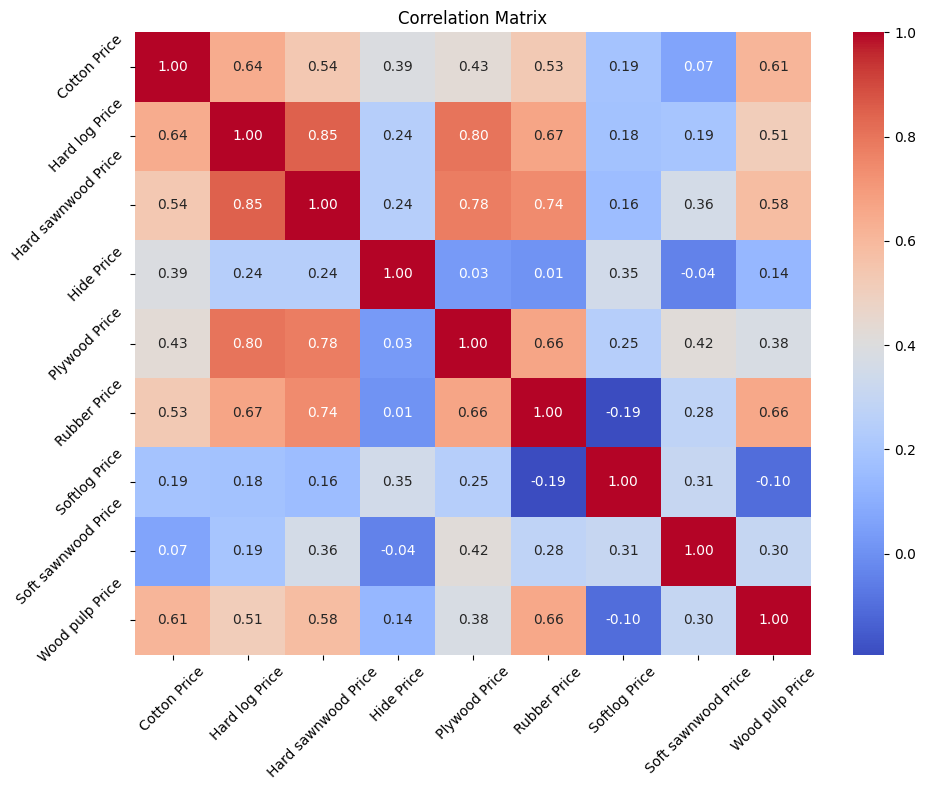

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = new_df.corr()

# Create the plot
plt.figure(figsize=(10, 8))

# Plotting the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Title
plt.title('Correlation Matrix')

# Show plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=45)  # Rotate y-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()